<a href="https://colab.research.google.com/github/Daisydi216/ml-category-prediction/blob/main/Category_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and inspecting the dataset

Before analysis, we will first load the dataset and take a look at its structure.

In this step, we will:
 - Load the CSV file from GitHub
 - Check how many rows and columns we have
 - Display the first few rows
 - Review data types and basic metadata for each column

This will help us ensure dataset is correctly loaded and ready for further exploration

In [49]:
import pandas as pd

# load dataset from GitHub (using the raw file URL)
url = "https://raw.githubusercontent.com/Daisydi216/ml-category-prediction/main/data/products.csv"

# Try reading the CSV with a common delimiter and error handling
try:
    df = pd.read_csv(url, delimiter=',', on_bad_lines='skip') # Assuming comma delimiter, skip bad lines
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")
    # If the above fails, try without specifying delimiter, letting pandas infer
    try:
        df = pd.read_csv(url, on_bad_lines='skip')
        print("Attempted reading without specifying delimiter.")
    except Exception as e:
        print(f"An error occurred with both attempts: {e}")
        df = None # Ensure df is None if loading fails


if df is not None:
    # Print shape (number of rows and columns)
    print("Dataset shape (rows, columns):", df.shape)

    # Clean column names and convert to lowercase
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.lower()

    # Apply string operations after cleaning column names

    df['product title'] = df['product title'].astype(str).str.strip().str.lower()
    df['category label'] = df['category label'].astype(str).str.strip().str.lower()
    df['_product code'] = df['_product code'].astype(str).str.strip().str.lower()

    # Convert 'Listing Date' to datetime objects
    df['listing date'] = pd.to_datetime(df['listing date'], errors='coerce')


    # Show first 5 rows
    print("\nFirst 5 rows:")
    display(df.head())

    # Show column data types and non-null counts
    print("\nDataset info:")
    df.info()
else:
    print("\nFailed to load the dataset.")

Dataset shape (rows, columns): (35311, 8)

First 5 rows:


,product id,product title,merchant id,category label,_product code,number_of_views,merchant rating,listing date
0,1,apple iphone 8 plus 64gb silver,1,mobile phones,qa-2276-xc,860.0,2.5,2024-05-10
1,2,apple iphone 8 plus 64 gb spacegrau,2,mobile phones,ka-2501-qo,3772.0,4.8,2024-12-31
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,mobile phones,fp-8086-ie,3092.0,3.9,2024-11-10
3,4,apple iphone 8 plus 64gb space grey,4,mobile phones,yi-0086-us,466.0,3.4,2022-05-02
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,mobile phones,nz-3586-wp,4426.0,1.6,2023-04-12



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product id       35311 non-null  int64         
 1   product title    35311 non-null  object        
 2   merchant id      35311 non-null  int64         
 3   category label   35311 non-null  object        
 4   _product code    35311 non-null  object        
 5   number_of_views  35297 non-null  float64       
 6   merchant rating  35141 non-null  float64       
 7   listing date     35252 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.2+ MB


## Checking for missing values

Missing data can cause problems during model training or analysis.
We will:
  - Count the number of missing (NaN) values per column
  - Visualize missing values using a heatmap

This will help us identify any columns that require cleaning or imputation.

In [ ]:
# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product id           0
product title        0
merchant id          0
category label       0
_product code        0
number_of_views     14
merchant rating    170
listing date        59
dtype: int64


In [ ]:
# Display the percentage of missing values
missing_percentage = df.isna().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])


Percentage of missing values per column:
Product Title      0.487100
 Category Label    0.124607
_Product Code      0.269038
Number_of_Views    0.039648
Merchant Rating    0.481436
 Listing Date      0.167087
dtype: float64


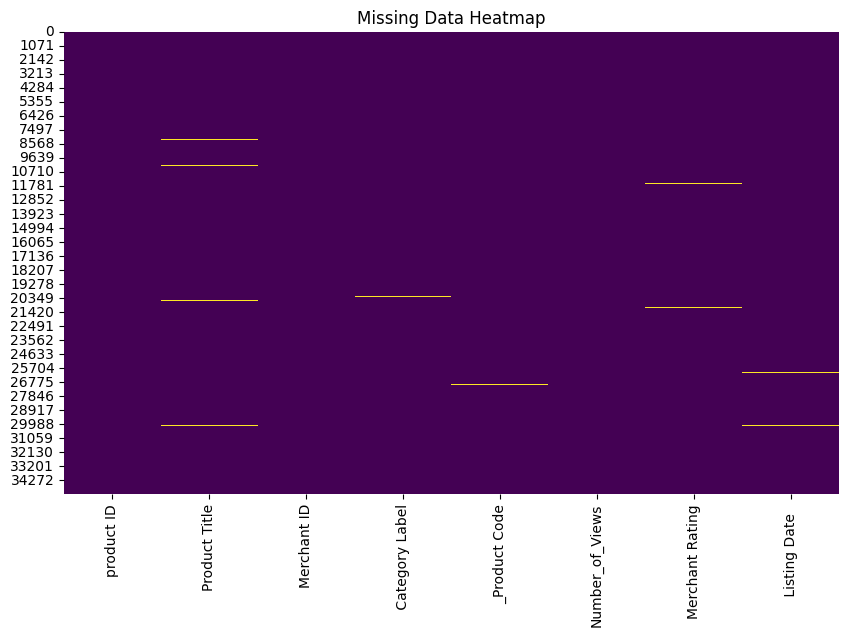

In [ ]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Visualize missing data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Handle missing values
# Filling missing values with mean/median (for numeric columns)

- **`df.select_dtypes(include=['float64', 'int64'])`**: This line selects all numeric columns from the DataFrame (`df`), which are of type `float64` (floating-point numbers) and `int64` (integers).
  
- **`median_value = df[col].mean()`**: Calculates the median of the selected numeric column.

- **`df[col].fillna(median_value, inplace=True)`**: Fills the missing values in that column with the computed mean directly in the DataFrame.

In [ ]:
# Filling missing values with mean/median (for numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value)

# Filling categorical columns with the mode

- **`df.select_dtypes(include=['object'])`**: This identifies all categorical columns (usually represented as strings) in the DataFrame.

- **`mode_value = df[col].mode()[0]`**: The `.mode()` method returns a Series of the most frequent values. `[0]` retrieves the first mode if there are multiple modes.

- **`df[col].fillna(mode_value, inplace=True)`**: This line fills in the missing values within categorical columns based on the determined mode

The mode is a statistical measure that represents the most frequently occurring value in a dataset. It is one of the measures of central tendency, alongside the mean (average) and median (middle value).

In [ ]:
# Filling categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value)

In [ ]:
# Verify if there are any missing values left
print("\nMissing values after handling:")
print(df.isna().sum())


Missing values after handling:
product ID         0
Product Title      0
Merchant ID        0
 Category Label    0
_Product Code      0
Number_of_Views    0
Merchant Rating    0
 Listing Date      0
dtype: int64


# Removing missing values

We will simply drop all rows that contain missing values, and check the new shape oand count missing values per column.

In [48]:
# Drop all rows with missing values
df = df.dropna()

# Display new shape of the dataset
print("New dataset shape:", df.shape)

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

New dataset shape: (34760, 8)
Missing values per column:
product id         0
product title      0
merchant id        0
category label     0
_product code      0
number_of_views    0
merchant rating    0
listing date       0
dtype: int64


In [45]:
df = pd.read_csv(url)

# Count the number of rows before removing missing values
rows_before = len(df)

# Filter out rows that contain at least one missing value
rows_with_nan = df[df.isnull().any(axis=1)]

# Display a random sample of rows that will be removed
print(" Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(15, len(rows_with_nan)), random_state=42))

# Remove rows with any missing values
df_cleaned = df.dropna()

# Count the number of rows after removing missing values
rows_after = len(df_cleaned)

# Show removal statistics
print("\n Removal statistics:")
print(f"- Number of rows before: {rows_before}")
print(f"- Number of rows after: {rows_after}")
print(f"- Number of removed rows: {rows_before - rows_after}")

 Randomly selected rows containing missing values:

       product ID                                      Product Title  \
34920       46948                                                NaN   
5908        11926                                                NaN   
8613        14740                                                NaN   
5735        11746  lg hospitality display 55lv340c lcd tv 139 7 c...   
17299       27177       aeg fss62600p integrated 13 place dishwasher   
14527       24130                                                NaN   
27516       38697                                samsung rf24fsedbsr   
25671       36643     miele f 9122 ui 2 built in small freezer white   
5912        11930       toshiba 32w1633db 81.3 cm 32 led lcd tv 16 9   
19410       29562                                                NaN   
10877       17267  hewlett packard enterprise intel xeon e5640 fi...   
553           554                                                NaN   
5933        

In [50]:
# Step 5: Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned data saved to cleaned_data.csv
